In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import re


# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [297]:
data = pd.read_csv('data/merged_data_cleaned.csv')


In [298]:
data = data.drop(columns=['Unnamed: 0'])

### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [299]:
data.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [300]:
print(f'shape of data is: {data.shape}')
print(f'total missing values are: {data.isna().sum().sum()}')

shape of data is: (1339, 43)
total missing values are: 4044


In [301]:
data.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


We see that the names of the features are not all following the same pattern of naming. We will make them all snake case.

In [302]:
data.columns = data.columns.str.replace('.','_')

The first thing I notice is that the alltitude is something numerical which is categorized. Let us see the value_counts of that.

## Working with Altitude

In [303]:
data['Altitude'].value_counts().to_csv('altitude_value_count.csv')

In [304]:
print(f'unique: {data.Altitude.nunique()}')

unique: 396


In [305]:
data.Altitude.sample(20)

321           800++
1020           1200
165          2000 m
1051       1500msnm
660             NaN
51           1400ft
163     above 1100m
103       1400 masl
745             533
133            1200
193            2560
475            900m
567      1200-2000m
59              NaN
754             NaN
1033           1100
790           1040m
1283            NaN
663            4300
67        1800-2000
Name: Altitude, dtype: object

Here we encouter a problem, that there are 396 different Altitude and they very much differ in their format.

It is straight ahead visible that the data is very messy. We need to fix that.

In [306]:
def clean_altitude_with_feet(val):
    if pd.isna(val):
        return np.nan

    val = str(val).lower().strip()

    # Remove commas, 'de', and normalize interval separator ' a ' -> '-'
    val = val.replace(',', '')
    val = val.replace('de ', '')
    val = val.replace(' a ', '-')

    # Detect if feet or meters
    is_feet = ('ft' in val) or ('feet' in val)

    # Remove known unit words (meters)
    for unit in ['msnm', 'mts', 'm', '公尺', 'feet', 'ft']:
        val = val.replace(unit, '')

    val = val.strip()

    # If range (interval), average it
    if '-' in val:
        parts = val.split('-')
        try:
            nums = [float(p.strip()) for p in parts]
            avg = sum(nums) / len(nums)
        except:
            return np.nan
    else:
        try:
            avg = float(val)
        except:
            return np.nan

    # Convert if feet
    if is_feet:
        avg = avg * 0.3048

    return avg


In [307]:
data.Altitude = data['Altitude'].apply(clean_altitude)

In [308]:
data['Altitude'].apply(clean_altitude).value_counts().to_csv('cleaned_altitude.csv')


In [309]:
data.Altitude.value_counts()

Altitude
1200.0    57
1100.0    51
1300.0    46
1500.0    42
1400.0    41
          ..
1059.0     1
1645.0     1
1473.0     1
1089.0     1
40.0       1
Name: count, Length: 181, dtype: int64

The approach we did was to try and filter some of the data where we knew what we could do and then return NaN where the sample had a unique format. Surely it would have been better to transform all the data, but this would take lot of time especially with a bit data set.

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

This I already did.

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

Let us take a look at the bag weights.

In [310]:
data.Bag_Weight.nunique()

56

In [311]:
data.Bag_Weight.value_counts()

Bag_Weight
1 kg        331
60 kg       256
69 kg       200
70 kg       156
2 kg        122
100 lbs      59
30 kg        29
5 lbs        23
6            19
20 kg        14
50 kg        14
10 kg        11
59 kg        10
1 lbs         8
1             7
3 lbs         7
5 kg          7
2 lbs         5
4 lbs         4
80 kg         4
18975 kg      4
0 lbs         3
46 kg         3
29 kg         2
9000 kg       2
25 kg         2
66 kg         2
35 kg         2
12000 kg      2
40 kg         2
6 kg          2
19200 kg      2
15 kg         2
13800 kg      1
100 kg        1
55 lbs        1
4 kg          1
67 kg         1
350 kg        1
3 kg          1
8 kg          1
80 lbs        1
24 kg         1
1500 kg       1
2 kg,lbs      1
0 kg          1
660 kg        1
1218 kg       1
2             1
18 kg         1
150 lbs       1
18000 kg      1
1 kg,lbs      1
132 lbs       1
34 kg         1
130 lbs       1
Name: count, dtype: int64

We see that there is a difference in the metrics. We here see how many different metrics there are, but considering we had a bigger data set we could use regex.

In [312]:
data.Bag_Weight.astype(str).str.extract(r'([a-zA-Z,]+)').value_counts()

0     
kg        1196
lbs        114
kg,lbs       2
Name: count, dtype: int64

In [313]:
def clean_weight(value):
    if pd.isna(value):
        return np.nan

    value = str(value).strip().lower().replace(" ", "")
    
    if 'kg' in value:
        value = value.replace('kg', '')
        factor = 1
    elif 'lbs' in value or 'lb' in value:
        value = value.replace('lbs', '').replace('lb', '')
        factor = 0.453592
    else:
        factor = 1  

    try:
        return float(value) * factor
    except ValueError:
        return np.nan


In [314]:
data['Bag_Weight'] = data["Bag_Weight"].apply(clean_weight)

In [315]:
data.Bag_Weight.astype(str).str.extract(r'([a-zA-Z]+)').value_counts()

0  
nan    2
Name: count, dtype: int64

Now we see that all has been transformed to kg and the 2 samples where we were not sure have been removed.

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [316]:
data.Harvest_Year.value_counts()

Harvest_Year
2012                        354
2014                        233
2013                        181
2015                        129
2016                        124
2017                         70
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
March 2010                    3
2009-2010                     3
Mayo a Julio                  3
4T/2010                       3
Abril - Julio                 2
January 2011                  2
2011/2012                     2
08/09 crop                    2
December 2009-March 2010      1
TEST                          1
4T72010                       1
2018                          1
1t/2011                       1
2016/2017                     1
3T/2011                    

In [317]:
count_of_harvest_year = data.Harvest_Year.count()

In [318]:
count_of_harvest_year

1292

In [319]:

def extract_year(value):
    # Find all 4-digit years between 1900–2099
    years = re.findall(r'(19\d{2}|20\d{2})', str(value))
    
    if not years:
        return np.nan  
    elif len(years) == 1:
        return int(years[0]) 
    else:
        return int(years[0])  


data['Harvest_Year'] = data['Harvest_Year'].apply(extract_year)


I belive this is the best way to process the data since months would give us no information as of which year the harvest was made. We could suppose that the year is the imoportant thing here, hence the column name. However if I had more information as to why the data might be important I might have kept the months in as well. Also where the year is between two years we choose to take the first one which I am not so sure of.

In [320]:
data.Harvest_Year

0       2014.0
1       2014.0
2          NaN
3       2014.0
4       2014.0
         ...  
1334    2016.0
1335    2016.0
1336    2014.0
1337    2013.0
1338    2013.0
Name: Harvest_Year, Length: 1339, dtype: float64

In [321]:
count_after_filtration_harvest_year = data.Harvest_Year.count()

In [322]:
count_after_filtration_harvest_year

1276

In [323]:
count_of_harvest_year - count_after_filtration_harvest_year

16

We have lost information from 16 samples which is:

In [324]:
16/len(data)*100

1.194921583271098

### Filtering other dates

In [325]:
data["Expiration"] = pd.to_datetime(data['Expiration'], format='mixed', errors='coerce')


In [326]:
data['Grading_Date']  = pd.to_datetime(data['Grading_Date'], format='mixed', errors='coerce')

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [327]:
data.Country_of_Origin.isna().sum()

1

In [328]:
data.Country_of_Origin.value_counts()

Country_of_Origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

What we can see is that there is one missing country and one country where the encoding of a charachter has gone wrong.

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [329]:
data.Owner.nunique()

315

In [330]:
data.Owner_1.nunique()


319

In [331]:
data.Owner

0                      metad plc
1                      metad plc
2       grounds for health admin
3            yidnekachew dabessa
4                      metad plc
                  ...           
1334                 luis robles
1335                 luis robles
1336                 james moore
1337               cafe politico
1338               cafe politico
Name: Owner, Length: 1339, dtype: object

In [332]:
data.Owner_1

0                      metad plc
1                      metad plc
2       Grounds for Health Admin
3            Yidnekachew Dabessa
4                      metad plc
                  ...           
1334                 Luis Robles
1335                 Luis Robles
1336                 James Moore
1337               Cafe Politico
1338               Cafe Politico
Name: Owner_1, Length: 1339, dtype: object

In [333]:
data[['Owner','Owner_1','Producer']]

,Owner,Owner_1,Producer
0,metad plc,metad plc,METAD PLC
1,metad plc,metad plc,METAD PLC
2,grounds for health admin,Grounds for Health Admin,NaN
3,yidnekachew dabessa,Yidnekachew Dabessa,Yidnekachew Dabessa Coffee Plantation
4,metad plc,metad plc,METAD PLC
...,...,...,...
1334,luis robles,Luis Robles,Café Robusta del Ecuador S.A.
1335,luis robles,Luis Robles,Café Robusta del Ecuador S.A.
1336,james moore,James Moore,Cafe Cazengo
1337,cafe politico,Cafe Politico,NaN


In [334]:
(data['Owner'].str.title() == data['Owner_1']).value_counts()


True     770
False    569
Name: count, dtype: int64

In [335]:
data.loc[data['Owner'].str.title() != data['Owner_1'], ['Owner', 'Owner_1']]

,Owner,Owner_1
0,metad plc,metad plc
1,metad plc,metad plc
2,grounds for health admin,Grounds for Health Admin
4,metad plc,metad plc
11,cqi q coffee sample representative,CQI Q Coffee Sample Representative
...,...,...
1320,ugacof,UGACOF
1321,ugacof,UGACOF
1325,ankole coffee producers coop,Ankole coffee producers coop
1328,kawacom uganda ltd,Kawacom Uganda LTD


From this we could simply say that Owner_1 is a more accurate version of owner where the owners are written as supposed to.

In [336]:
(data['Owner_1'] == data['Producer']).value_counts()

False    1210
True      129
Name: count, dtype: int64

From this we see that sometimes the producer and the owner are the same. Now i am going to drop the Owner column and rename the Owner_1 column to Owner

In [337]:
data.drop('Owner',axis=1)
data.rename(columns={'Owner_1':'Owner'},inplace=True)

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [338]:
table = data.pivot_table(
    index = "Country_of_Origin",
    columns = "Color",
    aggfunc="size",
    fill_value=0
)
continents = {
     'Colombia': 'South America',
    'Ethiopia': 'Africa',
    'Brazil': 'South America',
    'Guatemala': 'North America',
    'Kenya': 'Africa',
    'Indonesia': 'Asia',
    'Honduras': 'North America',
}
data['continents'] =data['Country_of_Origin'].map(continents)

In [339]:
table.head()

Color,Blue-Green,Bluish-Green,Green
Country_of_Origin,,,
Brazil,14,12,92
Burundi,0,0,1
China,0,0,16
Colombia,8,8,118
Costa Rica,10,9,28


In [340]:
color_by_continent = data.pivot_table(
    index='continents',
    columns='Color',
    aggfunc='size',
    fill_value=0
)

In [341]:
color_by_continent

Color,Blue-Green,Bluish-Green,Green
continents,,,
Africa,3,8,29
Asia,4,3,6
North America,5,9,206
South America,22,20,210


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [342]:
data.Aroma.describe()

count    1339.000000
mean        7.566706
std         0.377560
min         0.000000
25%         7.420000
50%         7.580000
75%         7.750000
max         8.750000
Name: Aroma, dtype: float64

In [343]:
data[data['Aroma'] <7].shape[0]

40

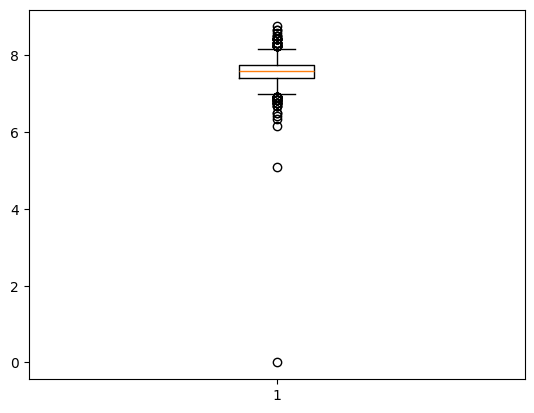

In [344]:
plt.boxplot(data=data,x='Aroma')
plt.show()

It is vissible that there is a value at zero which is very peculiar. We could consider it an outlier. Lets try to get rid of it and see what happens.

In [345]:
data = data[data["Aroma"]>5]

{'whiskers': [<matplotlib.lines.Line2D at 0x29874175ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x29873fac6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29874176e90>],
 'medians': [<matplotlib.lines.Line2D at 0x29874177fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29874177190>],
 'means': []}

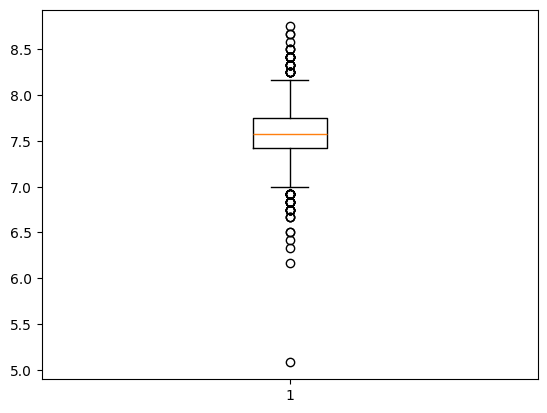

In [346]:
plt.boxplot(data=data,x="Aroma")

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!